# Sumário

- [Escala Logarítmica](#Escala-Logarítmica)
    - [Gráfico Log-Log](#Gráfico-Log-Log)
    - [Gráfico Semi-Log](#Gráfico-Semi-Log)
    - [Regressão em Escala Logarítmica](#Regressão-em-Escala-Logarítmica)

- [Equação Característica](#Equação-Característica)
    - [Encontrando os Coeficientes](#Encontrando-os-Coeficientes)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
config_nb = {
    'axes.spines.right': False,
    'axes.spines.top':   False,
    'axes.edgecolor':  '.4',
    'axes.labelcolor': '.0',
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'figure.autolayout': True,
    'figure.figsize': (8.1, 6.3),
    'font.size': 16.0,
    'grid.linestyle': '--',
    'legend.facecolor': '1.0',
    'legend.framealpha': 0.9,
    'legend.frameon': True,
    'savefig.transparent': False,
    'text.color': '.0',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
}
plt.style.use(['seaborn-darkgrid', 'seaborn-notebook', 'seaborn-bright', config_nb])

# Escala Logarítmica

Várias vezes os dados não apresentam relação linear diretamente. Nesses casos, é importante encontrar alguma técnica de linearização que transforma os dados para novos valores dependentes, mas que se relacionam de maneira linear. Algo como a relação abaixo.

$$ f(x, y) = a + b ~ g(x, y) $$

Dentre as técnicas mais comuns, muitas envolvem a aplicação de logaritmos para linearizar algum monômio, isto é, nos casos de $y \propto x^k$, ou alguma relação exponencial, $y \propto k^x$. Para esses casos, é comum a utilização de escala logarítmica na intenção de se observar melhor os dados, em que $f(x, y) = \log(y)$ e $g(x, y) = \log(x)$.


## Gráfico Log-Log

$$ R_d = \frac{R_1 R_2}{R_x} $$

Na planilha 'Dados.xlsx' da [*Introdução*](1%20-%20Introdução.ipynb#Importando-os-Dados "Introdução - Importando os Dados") tem uma página 'Wheatstone' com dados de uma ponte de *Wheatstone* equilibrada, dada pela equação teórica acima. Sendo $R_x$ uma resistência variável desconhecida e $R_d$ a resitência da década para equilibrar a ponte, os dados são:

In [3]:
dados = pd.read_excel('Dados.xlsx', sheet_name='Wheatstone')

Rx, dRx = dados['Rx'], dados['dRx']
Rd, dRd = dados['Rd'], dados['dRd']

dados

,Rd,dRd,Rx,dRx
0,97.507383,9.901677,242.259943,23.802814
1,176.178618,16.411749,128.252957,11.896228
2,265.223247,25.592678,75.409643,7.453010
3,472.702367,49.455439,33.593560,3.283713
4,722.588752,69.469333,24.337976,2.360337
5,735.839447,75.021459,33.429206,3.405061
6,934.017072,98.763679,29.783597,3.318839


<ErrorbarContainer object of 3 artists>

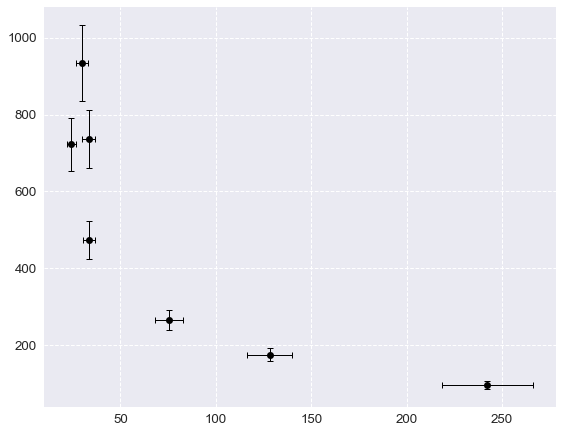

In [4]:
plt.errorbar(
    Rx, Rd, xerr=dRx, yerr=dRd,
    fmt='o', elinewidth=1, capsize=3, capthick=1, color='black',
    zorder=10, label='Dados Coletados'
)

Com esses dados, podemos aplicar a seguinte técnica de linearização:

$$
\begin{align}
    \log(R_d)
            &= \log\left(R_1 R_2 ~ (R_x)^{-1}\right) \\
            &= \log(R_1 R_2) + \log\left((R_x)^{-1}\right) \\
            &= \log(R_1 R_2) - \log(R_x)
\end{align}
$$

Portanto, podemos montar um gráfico <TT>log-log</TT> de $R_d$ por $R_x$. O <TT>pyplot</TT> tem as funções [`xscale`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xscale.html "matplotlib.pyplot.xscale") e [`yscale`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yscale.html "matplotlib.pyplot.yscale") para mudar as escalas dos eixos, que podem receber como argumento `'linear'` e `'log'` por padrão, além de algumas outras opções, mas também é possível adicionar [escalas](https://matplotlib.org/gallery/scales/custom_scale.html "Custom Scale") [customizadas](https://matplotlib.org/gallery/scales/scales.html "Scales") no <TT>Matplotlib</TT>.

Para facilitar na leitura dos dados, foram colocadas linhas internas com a função [`grid`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.grid.html "matplotlib.pyplot.grid") do <TT>pyplot</TT> e os argumentos `True`, para mostrar as linhas, e `which='minor'`, para desenhar entre as linhas principais. Elas também foram colocadas em ambos os eixos e com cor branca, com as opções `axis='both'` e `color='white'`.

Text(0.5, 1.0, 'Relação das Resistências em uma\nPonte de Wheatstone Equilibrada')

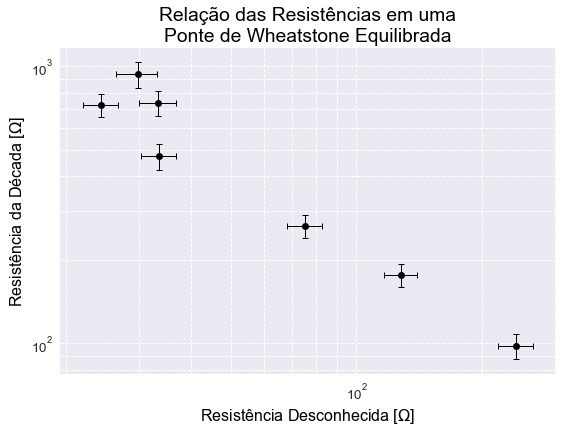

In [5]:
# dados com suas incertezas
plt.errorbar(
    Rx, Rd, xerr=dRx, yerr=dRd,
    fmt='o', elinewidth=1, capsize=3, capthick=1, color='black',
    zorder=10, label='Dados Coletados'
)

# escala logarítmica
plt.xscale('log')
plt.yscale('log')

# linhas de grid internas
plt.grid(True, which='minor', axis='both', color='white')

# textos
plt.xlabel('Resistência Desconhecida [$\Omega$]')
plt.ylabel('Resistência da Década [$\Omega$]')
plt.title('''Relação das Resistências em uma
Ponte de Wheatstone Equilibrada''')

## Gŕafico Semi-Log

$$ R = A ~ \exp\left(B ~ T^{-1}\right) $$

Para este exemplo vamos pegar os dados de um termistor, dado pela equação teórica acima. Os dados também estão na mesma planilha mas na página 'Termistor'.

In [6]:
dados = pd.read_excel('Dados.xlsx', sheet_name='Termistor')

T, dT = dados['T'], dados['dT']
R, dR = dados['R'], dados['dR']

dados

,T,dT,R,dR
0,294.925887,0.728044,6296.342463,144.354964
1,296.469249,2.098451,4878.498002,80.319765
2,302.936454,0.828066,3763.656688,89.056083
3,306.958873,1.696817,2889.843753,61.489262
4,310.502706,1.493930,2337.099188,55.708481
5,318.266144,1.953822,1770.149336,45.513623
6,323.269318,1.437839,1482.676575,41.707094
7,333.481466,1.283823,960.129548,16.467923
8,343.169333,1.142258,632.175532,15.229918
9,350.463304,1.984949,443.658912,9.726878


<ErrorbarContainer object of 3 artists>

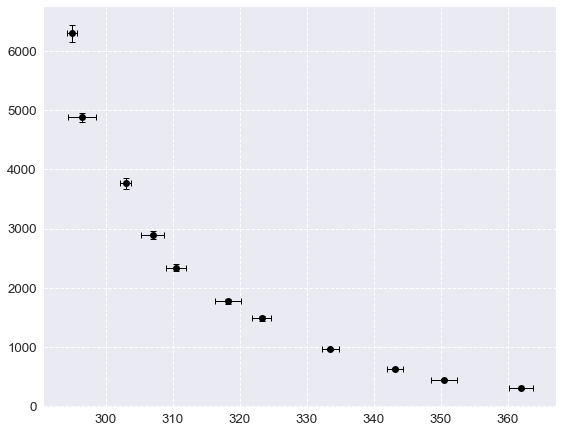

In [7]:
plt.errorbar(
    T, R, xerr=dT, yerr=dR,
    fmt='o', elinewidth=1, capsize=3, capthick=1, color='black',
    zorder=10, label='Dados Coletados'
)

Linearizando com $\ln$ fica:

$$
\begin{align}
    \ln(R)
            &= \ln\left(A ~ \exp\left(B ~ T^{-1}\right) \right) \\
            &= \ln(A) + \ln\left(\exp\left(B ~ T^{-1}\right) \right) \\
            &= \ln(A) + B ~ T^{-1}
\end{align}
$$

Que pode ser usada em um gráfico <TT>semi-log</TT> de $R \times T^{-1}$, feito similar à seção [*Gráfico Log-Log*](#Gráfico-Log-Log "Escala Logarítmica - Gráfico Log-Log"), que pode ser visto abaixo. Uma das diferenças específicas da equação (\ref{eq:termistor}) é a transformação do eixo $x$ da temperatura para $T^{-1}$.

Text(0.5, 1.0, 'Relação da Resistência pelo Inverso\nda Temperatura em um Termistor')

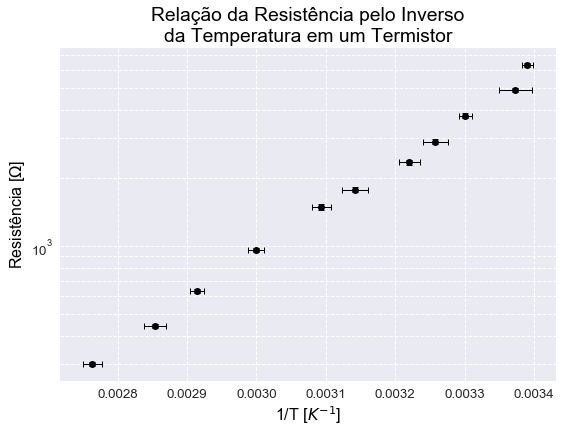

In [8]:
# transformação do eixo x
x = 1/T
dx = dT/T**2

# dados com incertezas
plt.errorbar(
    x, R, xerr=dx, yerr=dR,
    fmt='o', elinewidth=1, capsize=3, capthick=1, color='black',
    zorder=10, label='Dados Coletados'
)

# escala logarítmica
plt.yscale('log')

# linhas de grid
plt.grid(True, which='minor', axis='y', color='white')

# textos
plt.xlabel('1/T [$K^{-1}$]')
plt.ylabel('Resistência [$\Omega$]')
plt.title('''Relação da Resistência pelo Inverso
da Temperatura em um Termistor''')

> A escolha de transformar o eixo, como foi feito no eixo $x$ aqui, ou mudar a escala, igual do eixo $y$, é uma parte importante da montagem dos gráficos. Normalmente, é preferível mexer na escala quando é uma escala conhecida ou quando se busca explicitar os valores originais do eixo. Nos casos em que isso não é necessário ou não é possível, a transformação dos eixos acaba sendo uma opção menos confusa.

## Regressão em Escala Logarítmica

Uma opção comum para a regressão de uma curva de um monômio ou de uma exponencial é encontrar uma linearização, como a da seção , e, com a nova relação linear de $f(x, y) \times g(x, y)$, aplicar a regressão como da seção [*Gráfico Log-Log*](#Gráfico-Log-Log "Escala Logarítmica - Gráfico Log-Log"). O único detalhe é que é preciso encontrar os valores de $f(x, y)$ e $g(x, y)$ e suas incertezas para cada par $(x, y)$ dos dados e só com esses valores pode-se encontrar os coeficientes $a$ e $b$, como foi abaixo.

Vamos utilizar aqui novamente os dados da ponte de *Wheatstone* equilibrada. No caso, como a transformação é $f(x, y) = \log_{10}(x)$, a incerteza fica $\sigma_{\log x} = \frac{1}{\ln(10)} \frac{\sigma_x}{x}$, sendo que para o eixo $y$ a transformação é igual. As funções matemáticas utilizadas foram do <TT>NumPy</TT>, pelas técnicas de vetorização oferecidas, sendo elas [`log`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html "numpy.log") e [`log10`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html "numpy.log10"), que equivalem a $\ln(x)$ e $\log_{10}(x)$.

coef. angular = -0.9589988851991091+-0.09491213673428928
coef. linear  = 4.254683558475574+-0.1709217730708846


Text(0.5, 1.0, 'Relação das Resistências em uma\nPonte de Wheatstone Equilibrada')

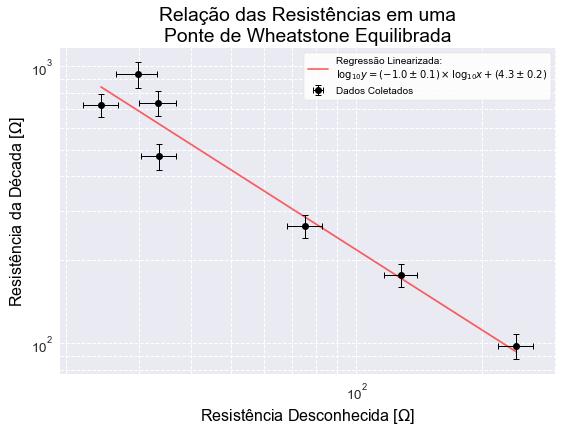

In [9]:
from scipy import odr

dados = pd.read_excel('Dados.xlsx', sheet_name='Wheatstone')
Rx, dRx = dados['Rx'], dados['dRx']
Rd, dRd = dados['Rd'], dados['dRd']

# transforma os dados para a linearização
logRx = np.log10(Rx)
logRd = np.log10(Rd)

dlogRx = dRx / (Rx * np.log(10))
dlogRd = dRd / (Rd * np.log(10))

# regressão linear com incertezas
data = odr.RealData(logRx, logRd, sx=dlogRx, sy=dlogRd)
odreg = odr.ODR(data, odr.models.unilinear)
ans = odreg.run()

a, b = ans.beta      # logy = a logx + b
da, db = ans.sd_beta # incertezas de a e b

# mostrando os coeficientes e suas incertezas
print(f'coef. angular = {a}+-{da}')
print(f'coef. linear  = {b}+-{db}')

rotulo = f'''Regressão Linearizada:
$\log_{{10}}y = ({a:.1f} \pm {da:.1f}) \\times \log_{{10}}x + ({b:.1f} \pm {db:.1f})$'''

# monta os limites para desenho da reta
X = np.logspace(min(logRx), max(logRx), num=200)
Y =  10 ** (a*np.log10(X) + b)

# dados com as incertezas
plt.errorbar(
    Rx, Rd, xerr=dRx, yerr=dRd,
    fmt='o', elinewidth=1, capsize=3, capthick=1, color='black',
    zorder=10, label='Dados Coletados'
)
# regressão linear
plt.plot(X, Y, color='red', alpha=0.6, label=rotulo)

# escala logarítmica
plt.xscale('log')
plt.yscale('log')

# linhas de grid internas
plt.grid(True, which='minor', axis='both', color='white')

# legendas e textos do gráfico
plt.legend()
plt.xlabel('Resistência Desconhecida [$\Omega$]')
plt.ylabel('Resistência da Década [$\Omega$]')
plt.title('''Relação das Resistências em uma
Ponte de Wheatstone Equilibrada''')

> Perceba que a regressão obteve coeficiente angular próximo de $-1$, como era o esperado pela equação da ponte de *Wheatstone*.

# Equação Característica

Um bom exemplo para tratar deste assunto é o experimento do termistor.

## Encontrando os Coeficientes

Para isso, o primeiro passo normalmente é conseguir uma relação de linearização, como da seção [*Gráfico Semi-Log*](#Gráfico-Semi-Log) para poder aplicar alguma técnica de regressão linear e coeficientes dessa relação. Isso pode ser feito como na seção [*Regressão em Escala Logarítmica*](#Regressão-em-Escala-Logarítmica).

Depois que os coeficientes da reta foram encontrados, é preciso transformar os coeficientes para a forma inicial da equação. No caso do termistor, isso seria $A = e^b$ e $B = a$, com incertezas $\sigma_A = e^b \sigma_b$ e $\sigma_B = \sigma_a$. No código abaixo, todas as transformações, juntamente com a regressão, são feitas diretamente no código, como exemplo. No exemplo também é usada a função [`exp`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html "numpy.exp"), que é apenas $\exp(x) := e^x$.

Note que para este exemplo, no entanto, os eixos do gráfico estão invertidos em relação à seção [*Gráfico Semi-Log*](#Gráfico-Semi-Log), porque faz mais sentido tratar a equação característica da forma inversa, que é:

$$ T = \frac{B}{\ln(R) - \ln(A)} $$

valor inicial   = 0.0006104004834168065+-0.0001646931669524835
fator de cresc. = 4743.937585710917+-86.05595435880726


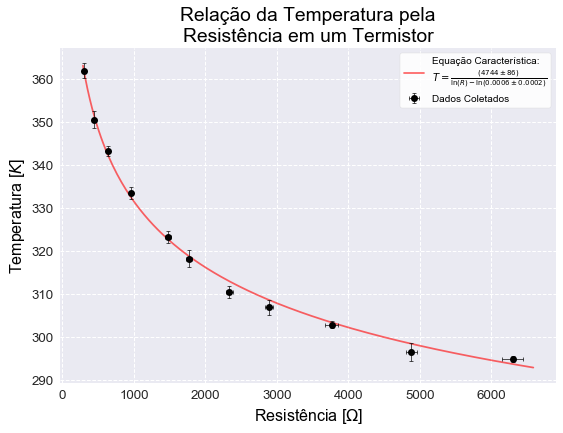

In [10]:
# coletando
dados = pd.read_excel('Dados.xlsx', sheet_name='Termistor')
# e separando os dados
T, dT = dados['T'], dados['dT']
R, dR = dados['R'], dados['dR']

# valores medidos
plt.errorbar(
    R, T, xerr=dR, yerr=dT,
    fmt='o', elinewidth=2/3, capsize=2, capthick=2/3, color='black',
    zorder=10, label='Dados Coletados'
)

# transformação dos eixos
logR = np.log(R)
dlogR = dR / R

Tinv = 1/T      # inverso da temperatura
dTinv = dT/T**2

# regressão linear com incertezas
data = odr.RealData(Tinv, logR, sx=dTinv, sy=dlogR)
odreg = odr.ODR(data, odr.models.unilinear)
ans = odreg.run()

# coeficientes: lnR = a T^-1 + b
a, b = ans.beta
da, db = ans.sd_beta

# transforma para R = A e^(B/T)
A = np.exp(b)
dA = db * np.exp(b)

B = a
dB = da

# mostra os coeficientes da eq. característica
print(f'valor inicial   = {A}+-{dA}')
print(f'fator de cresc. = {B}+-{dB}')

# desenha a eq. característica
rotulo = f'''Equação Característica:
$T = \\frac{{({B:.0f} \pm {dB:.0f})}}{{\ln(R) - \ln({A:.4f} \pm {dA:.4f})}}$'''

Rs = np.linspace(min(R) - 2*min(dR), max(R) + 2*max(dR), num=200)
# então T = B/ln(R/A) = B/(lnR-lnA)
Ts = B/(np.log(Rs) - np.log(A))
plt.plot(Rs, Ts, color='red', alpha=0.6, label=rotulo)

# textos e legenda
plt.xlabel('Resistência [$\Omega$]')
plt.ylabel('Temperatura [$K$]')
plt.title(f'''Relação da Temperatura pela
Resistência em um Termistor''')
plt.legend()

---
Ignore o código abaixo, é pra carregar os estilos.

In [11]:
from IPython.core.display import HTML

with open('.estilo.css', 'r') as estilo_arq:
    estilo = estilo_arq.read()

HTML(estilo)